This script plot the difference between CTRL and CUX1 KD ATAC seq signal in human CD34+ HSPC for the CUX1-promotor bound loops and non-interacting loops. The loops are identified from CD34 HiC in Zhang 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [2]:
os.chdir("../../data")

import the count matrix from computeMatrix

In [3]:
interact_2 = pd.read_csv("analysis_2_results/outMatrix_CD34_q30_srt_interact.tab",header = 0,sep = "\t")
promoters = pd.read_csv("analysis_2_results/outMatrix_CD34_q30_srt_promoters.tab",header = 0,sep = "\t")
#non_interact = pd.read_csv("analysis_2_results/outMatrix_CD34_q30_srt_no_interact_fixed.tab",header = 0,sep = "\t")
interact_1 = pd.read_csv("analysis_1_results/CD34_ATAC_CUX1_interacting_loops_Heatmap_values.txt",header = 0,sep = "\t")
non_interact_1 = pd.read_csv("analysis_1_results/CD34_ATAC_non_CUX1_interacting_loops_Heatmap_values.txt",header = 0,sep = "\t")
interact_1.columns = interact_1.columns.str.replace('WT','CTRL', regex=False)
non_interact_1.columns = non_interact_1.columns.str.replace('WT','CTRL', regex=False)

In [4]:
interact_1

,bamCompare CD34 ATAC KD RPKM,bamCompare CD34 ATAC KD RPKM.1,bamCompare CD34 ATAC KD RPKM.2,bamCompare CD34 ATAC KD RPKM.3,bamCompare CD34 ATAC KD RPKM.4,bamCompare CD34 ATAC KD RPKM.5,bamCompare CD34 ATAC KD RPKM.6,bamCompare CD34 ATAC KD RPKM.7,bamCompare CD34 ATAC KD RPKM.8,bamCompare CD34 ATAC KD RPKM.9,...,bamCompare CD34 ATAC CTRL RPKM.190,bamCompare CD34 ATAC CTRL RPKM.191,bamCompare CD34 ATAC CTRL RPKM.192,bamCompare CD34 ATAC CTRL RPKM.193,bamCompare CD34 ATAC CTRL RPKM.194,bamCompare CD34 ATAC CTRL RPKM.195,bamCompare CD34 ATAC CTRL RPKM.196,bamCompare CD34 ATAC CTRL RPKM.197,bamCompare CD34 ATAC CTRL RPKM.198,bamCompare CD34 ATAC CTRL RPKM.199
0,0.5904,0.3936,0.1968,0.1855,0.3711,0.4638,0.5566,0.5566,0.6494,0.3711,...,0.4547,0.9093,1.0810,0.9093,0.7380,0.8501,0.5667,0.2834,0.1713,0.3426
1,0.3936,0.5904,0.3936,0.3823,0.3711,0.3711,0.1855,0.0000,0.0000,0.0000,...,1.4230,0.7708,0.7708,0.8565,1.1130,1.2850,1.2850,1.4560,1.6270,2.3920
2,0.1968,0.0000,0.1855,0.3711,0.3711,0.1855,0.0000,0.0000,0.0000,0.0000,...,3.4790,4.0450,5.1520,5.6630,7.2540,12.5400,20.1300,25.7400,27.6300,31.9900
3,0.0000,0.1855,0.7534,1.7150,3.2670,4.9280,6.5790,10.9200,18.0100,24.6100,...,1.0810,1.3380,0.8829,0.4282,0.5139,0.7708,1.0280,0.8565,1.1400,1.4230
4,0.3711,0.5679,0.5792,0.5904,0.3936,0.1968,0.0000,0.1968,0.5904,0.9840,...,0.2834,0.0000,0.0000,0.3426,0.6852,0.8565,0.7972,0.4547,0.2834,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.7647,0.9615,0.8631,0.7647,0.7647,0.5792,0.6776,0.7647,0.9502,0.7534,...,0.3426,0.5139,0.5139,0.7972,1.2520,1.2520,0.9685,0.3426,0.1713,0.4547
268,0.4864,0.2839,0.1855,0.2783,0.5679,0.9502,1.7370,2.3170,3.2560,2.6540,...,2.0820,0.9421,0.3426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
269,1.1360,1.2400,1.1580,1.2790,1.7490,2.5020,2.9720,2.9830,2.5250,2.3500,...,0.3426,0.1713,0.1713,0.5139,0.8565,1.3110,1.9900,2.5570,2.1020,1.8190
270,0.9277,1.1250,1.3210,1.5180,1.3330,1.1580,1.3660,1.5630,1.6390,1.3330,...,1.5940,1.8510,1.7390,1.5420,1.4820,1.1660,0.9093,0.7116,1.2520,1.3640


In [5]:
non_interact_1
promoters

,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.1,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.2,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.3,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.4,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.5,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.6,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.7,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.8,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.9,...,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.30,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.31,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.32,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.33,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.34,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.35,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.36,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.37,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.38,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.39
0,0.08565,0.1713,0.2569,0.1713,0.2569,0.5139,0.8565,0.8565,0.9685,1.081,...,5.6370,5.0970,4.5290,3.4750,2.6990,2.6990,3.0810,2.7860,1.6280,0.3823
1,1.56800,2.2530,3.5350,4.1870,5.2680,7.0340,10.7000,15.1900,15.6100,13.750,...,11.0800,8.6530,9.5110,9.1990,8.6960,6.2920,4.9420,3.4130,2.4680,1.2510
2,28.87000,24.9200,18.2100,13.2800,11.0100,10.5300,10.8700,11.2300,12.0900,12.060,...,1.9880,1.3210,0.7760,0.8800,1.1580,1.1470,1.3380,1.7370,1.8470,2.4380
3,2.95800,3.3870,3.9010,4.5270,6.0320,7.4550,8.2530,7.7720,6.4900,5.581,...,0.5679,0.5566,0.9390,1.3210,1.4250,0.8575,0.4751,0.3936,0.7872,1.1810
4,2.21400,2.4710,3.1300,3.1890,3.7890,4.9280,13.0300,22.3100,27.6600,26.070,...,52.3900,60.3300,67.0600,62.9900,49.9400,31.4500,18.5900,9.9160,7.9530,6.0080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,4.46700,6.5430,9.6990,12.1400,15.2100,22.5100,38.0200,62.8700,87.1500,98.830,...,3.5850,2.6460,2.5360,1.5630,0.7760,0.0984,0.0000,0.0984,0.1968,0.1968
380,2.50400,2.8460,2.7340,2.2800,1.9110,2.5630,5.3500,8.1110,12.2100,18.800,...,2.1310,2.0330,1.7370,1.6390,0.9728,0.5904,0.5792,0.5679,0.3711,0.1855
381,12.21000,18.8000,26.3000,33.0600,36.7000,42.8100,47.5300,47.3100,40.4100,33.990,...,0.3711,0.1855,0.0000,0.0000,0.1968,0.5904,0.9840,1.1700,0.9615,0.5679
382,2.79000,3.2450,3.0180,2.9880,6.8850,13.2900,20.2300,21.9400,23.4300,27.170,...,3.3180,2.6570,2.7100,2.8620,2.7470,2.3640,1.7040,1.5070,1.6110,2.8560


aggregate the RPKM values for all the bins(columns) for each region

In [6]:
interact_CTRL_1 = interact_1.filter(regex = "CTRL").sum(axis = 1)
interact_KD_1 = interact_1.filter(regex = "KD").sum(axis = 1)
interact_plot_1 = pd.DataFrame({'CTRL':interact_CTRL_1,'KD':interact_KD_1})

In [7]:
promoters_CTRL = promoters.filter(regex = "CTRL").sum(axis = 1)
promoters_KD = promoters.filter(regex = "KD").sum(axis = 1)
promoters_plot = pd.DataFrame({'CTRL':promoters_CTRL,'KD':promoters_KD})

In [8]:
interact_CTRL_2 = interact_2.filter(regex = "CTRL").sum(axis = 1)
interact_KD_2 = interact_2.filter(regex = "KD").sum(axis = 1)
interact_plot_2 = pd.DataFrame({'CTRL':interact_CTRL_2,'KD':interact_KD_2})

In [9]:
non_interact_CTRL_1 = non_interact_1.filter(regex = "CTRL").sum(axis = 1)
non_interact_KD_1 = non_interact_1.filter(regex = "KD").sum(axis = 1)
non_interact_plot_1 = pd.DataFrame({'CTRL':non_interact_CTRL_1,'KD':non_interact_KD_1})
#randomly sample 272 rows to size match with the interacting loops. This is because the variance of the interact loops are drastically higher than the non-interaction loops. t test has to assume euaal variance
non_interact_plot_sample_1 = non_interact_plot_1.sample(n = 272)

Perform statistical test

In [10]:
scipy.stats.ttest_ind(non_interact_plot_sample_1['CTRL'],non_interact_plot_sample_1['KD'])

Ttest_indResult(statistic=1.1246413303702585, pvalue=0.261238861955434)

In [11]:
scipy.stats.ttest_ind(interact_plot_1['CTRL'],interact_plot_1['KD'])

Ttest_indResult(statistic=2.276029276439668, pvalue=0.023233530546983894)

In [12]:
scipy.stats.ttest_ind(promoters_plot['CTRL'],promoters_plot['KD'])

Ttest_indResult(statistic=4.501809322676189, pvalue=7.785618652771455e-06)

In [13]:
scipy.stats.ttest_ind(interact_plot_2['CTRL'],interact_plot_2['KD'])

Ttest_indResult(statistic=4.410079545669657, pvalue=1.0757658154187705e-05)

Plot

In [14]:
# Join the two data frame together for plotting
promoters_plot['sample']='promoters'
interact_plot_1['sample']="interact"
interact_plot_2['sample']="interact_enhancers"
non_interact_plot_sample_1['sample']="non_interact"

In [15]:
promoters_plot = pd.melt(promoters_plot,id_vars='sample',var_name="condition",value_name="RPKM")
interact_plot_1 = pd.melt(interact_plot_1,id_vars='sample',var_name="condition",value_name="RPKM")
interact_plot_2 = pd.melt(interact_plot_2,id_vars='sample',var_name="condition",value_name="RPKM")
non_interact_plot_sample_1 = pd.melt(non_interact_plot_sample_1,id_vars='sample',var_name="condition",value_name="RPKM")

In [16]:
final_plot=non_interact_plot_sample_1.append(interact_plot_1)
final_plot=final_plot.append(interact_plot_2)
final_plot=final_plot.append(promoters_plot)
final_plot['log2_RPKM'] = np.log2(final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


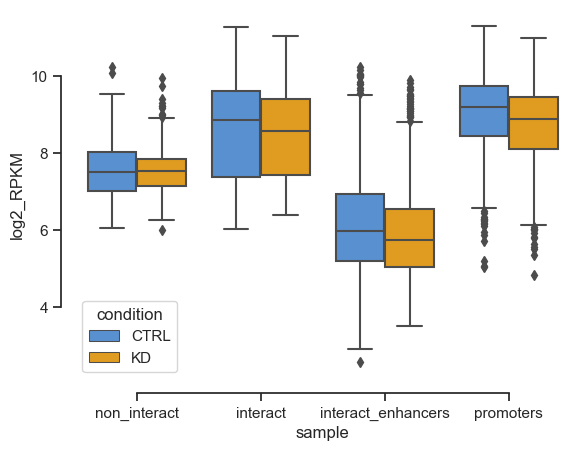

In [17]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(x="sample", y="log2_RPKM",
            hue="condition",palette=my_pal,
            data=final_plot)
sns.despine(offset=10, trim=True)